<a href="https://www.kaggle.com/code/rajendarkatravath/abalone-regression-voting-regressor?scriptVersionId=174404588" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Loading the datasets

In [2]:
# importing the libraries for loading the datasets
import pandas as pd
import numpy as np
train_df=pd.read_csv("/kaggle/input/playground-series-s4e4/train.csv")
test_df=pd.read_csv("/kaggle/input/playground-series-s4e4/test.csv")


In [3]:
# finding the null values in the train dataset
train_df.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
Rings             0
dtype: int64

In [4]:
# finding the shape of the train dataset

train_df.shape

(90615, 10)

In [5]:
# finding the columns names of the train datset
train_df.columns

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole weight',
       'Whole weight.1', 'Whole weight.2', 'Shell weight', 'Rings'],
      dtype='object')

In [6]:
# findin the unique values in the sex column of train
train_df["Sex"].unique()

array(['F', 'I', 'M'], dtype=object)

In [7]:
# analyizing the discrptive statistics

train_df.describe()

,id,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
count,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000
mean,45307.000000,0.517098,0.401679,0.135464,0.789035,0.340778,0.169422,0.225898,9.696794
std,26158.441658,0.118217,0.098026,0.038008,0.457671,0.204428,0.100909,0.130203,3.176221
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,22653.500000,0.445000,0.345000,0.110000,0.419000,0.177500,0.086500,0.120000,8.000000
50%,45307.000000,0.545000,0.425000,0.140000,0.799500,0.330000,0.166000,0.225000,9.000000
75%,67960.500000,0.600000,0.470000,0.160000,1.067500,0.463000,0.232500,0.305000,11.000000
max,90614.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


## EDA (exploratory data analaysis)


In [9]:
# label Encoding (preprocessing)
# data preprocessing
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

train_df['Sex']=encoder.fit_transform(train_df['Sex'])


In [10]:
# finding the correlation of the train dataset
train_df.corr()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
id,1.000000,-0.003553,0.004724,0.004290,0.005916,0.005228,0.004203,0.004878,0.005887,0.000938
Sex,-0.003553,1.000000,-0.020774,-0.021648,-0.029732,-0.027787,-0.017512,-0.032769,-0.033301,-0.026308
Length,0.004724,-0.020774,1.000000,0.989732,0.916094,0.931449,0.909609,0.913134,0.911073,0.623786
Diameter,0.004290,-0.021648,0.989732,1.000000,0.919618,0.933848,0.908466,0.914668,0.917871,0.636832
Height,0.005916,-0.029732,0.916094,0.919618,1.000000,0.902344,0.861769,0.886132,0.904019,0.665772
Whole weight,0.005228,-0.027787,0.931449,0.933848,0.902344,1.000000,0.971249,0.974319,0.964201,0.617274
Whole weight.1,0.004203,-0.017512,0.909609,0.908466,0.861769,0.971249,1.000000,0.949227,0.911800,0.515067
Whole weight.2,0.004878,-0.032769,0.913134,0.914668,0.886132,0.974319,0.949227,1.000000,0.937069,0.588954
Shell weight,0.005887,-0.033301,0.911073,0.917871,0.904019,0.964201,0.911800,0.937069,1.000000,0.694766
Rings,0.000938,-0.026308,0.623786,0.636832,0.665772,0.617274,0.515067,0.588954,0.694766,1.000000


In [11]:
# spliting the dataset into dependent and independent feature
X=train_df.drop('Rings',axis=1)
y=train_df['Rings']

## DIstribution of Target variable

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


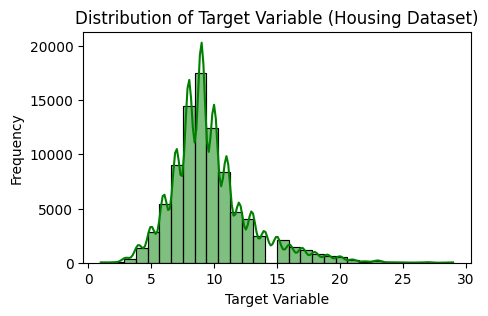

In [18]:
# Create a histogram of the target variable
plt.figure(figsize=(5, 3))
sns.histplot(y, kde=True, bins=30, color='green')
plt.xlabel('Target Variable')
plt.ylabel('Frequency')
plt.title('Distribution of Target Variable (Housing Dataset)')
plt.show()

In [19]:
# spliting the datset for training and testing
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=40)

## Importing the necesary models


In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import  GradientBoostingRegressor,RandomForestRegressor,VotingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Creating individual regression models

In [79]:
# Create individual regression models
xgb_reg = XGBRegressor()
rf_reg=RandomForestRegressor()
gb_reg=GradientBoostingRegressor()

In [80]:
voting_reg=VotingRegressor(estimators=[('XGB',xgb_reg),('gb',gb_reg),("rf",rf_reg)],n_jobs=5)

In [81]:
# Calculate a suitable shift if there are negative values
min_value = min(y_train.min(), 0)  # Find the minimum value or zero
shift = 1 - min_value  # Making sure all values will be positive before log transformation




In [82]:
y_train_transformed = np.log(y_train + shift) 

## Voting Regressor Model training

In [83]:
# Fit the Voting Regressor on the training data
voting_reg.fit(X_train, y_train_transformed)

VotingRegressor(estimators=[('XGB',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...)),
                            ('gb', GradientBoostingRegressor()),
                            ('rf', RandomForestRegressor())],
                n_jobs=5)

In [84]:
# make the predictions 

pred=voting_reg.predict(X_test)

## Model evaluation


In [85]:
# Model evalution
from sklearn.metrics import mean_squared_log_error
rmsle = np.sqrt(mean_squared_log_error(y_test, pred))
print("Root Mean Squared Logarithmic Error on validation set:", rmsle)


Root Mean Squared Logarithmic Error on validation set: 1.1510841811307213


## visualization of 20 predictions by voting regressor


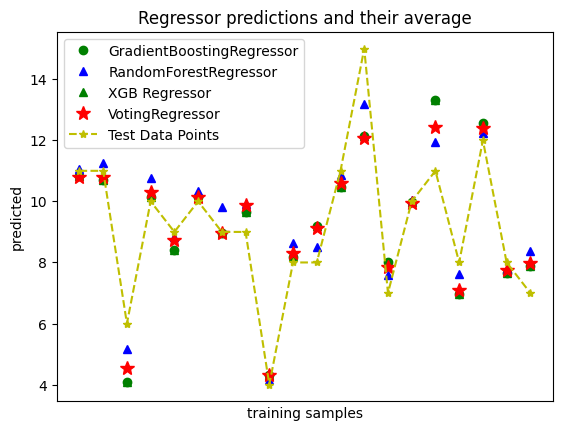

In [88]:
xt = X[:20]

#linear_reg.fit(X_train, y_train)
#svr_reg.fit(X_train, y_train)
xgb_reg.fit(X_train, y_train)
rf_reg.fit(X_train, y_train)
gb_reg.fit(X_train, y_train)
voting_reg.fit(X_train, y_train)

pred_xgb_reg = xgb_reg.predict(xt)
pred_rf_reg = rf_reg.predict(xt)
pred_voting_reg = voting_reg.predict(xt)
pred_voting_reg=voting_reg.predict(xt)

plt.figure()
plt.plot(pred_xgb_reg, "go", label="GradientBoostingRegressor")
plt.plot(pred_rf_reg, "b^", label="RandomForestRegressor")
plt.plot(pred_xgb_reg, "g^", label="XGB Regressor")

plt.plot(pred_voting_reg, "r*", ms=10, label="VotingRegressor")
plt.plot( y[:20],"y*--", label = 'Test Data Points')

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend(loc="best")
plt.title("Regressor predictions and their average")

plt.show()

## Submission


In [71]:
# predections

from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()

test_df['Sex']=encoder.fit_transform(test_df['Sex'])
test_predictions=Model.predict(test_df)

In [72]:
 Submission
submission_df = pd.DataFrame({'id': test_df['id'], 'Rings': test_predictions})
submission_df.to_csv('submission.csv', index=False)

In [73]:
submission_df

,id,Rings
0,90615,9.691983
1,90616,9.786551
2,90617,10.288374
3,90618,10.173949
4,90619,7.593120
...,...,...
60406,151021,6.363773
60407,151022,9.502973
60408,151023,11.286935
60409,151024,13.412789
